- Name: Ramitha V
- PRN: 22070126082
- Batch: AIML B1

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

### What is clustering?

- Clustering is a machine learning technique used for grouping similar objects or data points into clusters. 
- The goal of clustering is to partition a dataset into groups, or clusters, such that data points within the same cluster are more similar to each other than they are to data points in other clusters.
- Clustering is an unsupervised learning method, meaning that it does not require labeled data for training.

### Why is Clustering needed?

- Clustering is an unsupervised learning task, which means it does not require labeled data. Instead, it relies on the inherent structure of the data to identify patterns and similarities.
- The main objective of clustering is to group data points that are similar to each other into the same cluster. Similarity is usually defined based on some distance metric, such as Euclidean distance or cosine similarity.
- Clustering algorithms typically do not require any prior knowledge about the data or the number of clusters. However, the number of clusters may need to be specified as a parameter in some algorithms.

### Dataset Description

- The dataset comprises observational and simulated data on supernovae events, offering insights into their spatial distribution, luminosity, and spectral characteristics. With parameters like redshift and host galaxy properties, it aids in classifying supernovae types and serves as a vital resource for cosmological studies. By analyzing these data, astronomers advance our understanding of stellar evolution, galaxy formation, and the fundamental properties of the universe.

- The dataset was obtained from unstop hackathon on stellar analytics and now is publicly available in kaggle for analysis.

- The dataset has 40000 rows and 82 columns

- The dataset has the following columns:

    - SUBSURVEY: This column likely indicates the specific survey or sub-survey under which each supernova observation was conducted.
    - SNID: This column provides a unique identifier for each supernova event, facilitating tracking and referencing in the dataset.
    - IAUC: The International Astronomical Union Circular (IAUC) designation, if available, which may serve as an additional identifier for the supernova event.
    - FAKE: A binary indicator (1 or 2) denoting whether the supernova event is real (1) or simulated (2), providing insight into the nature of the observation.
    - RA and DECL: These columns represent the Right Ascension and Declination coordinates, respectively, pinpointing the celestial location of each supernova event.
    - PIXSIZE, NXPIX, NYPIX, and CCDNUM: These columns relate to observational parameters, such as pixel size, number of pixels in the X and Y directions, and the CCD number associated with the observation.
    - SNTYPE: This column categorizes the supernova event into different types based on observational characteristics or spectral features.
    - NOBS, PTROBS_MIN, and PTROBS_MAX: These columns provide information about the number of observations made for each supernova event and pointers to those observations.
    - MWEBV and MWEBV_ERR: Columns related to Galactic extinction correction, indicating the amount of interstellar dust along the line of sight and its associated error.
    - REDSHIFT_HELIO, REDSHIFT_HELIO_ERR, REDSHIFT_FINAL, and REDSHIFT_FINAL_ERR: These columns contain information about the heliocentric and final redshifts of the supernova events, along with associated errors.
    - VPEC and VPEC_ERR: Columns representing the peculiar velocity of the supernova events and its error, which can affect redshift measurements.
    - HOSTGAL_OBJID: Object ID of the host galaxy associated with each supernova event.
    - HOSTGAL_PHOTOZ and HOSTGAL_PHOTOZ_ERR: Photometric redshift and its error for the host galaxy.
    - HOSTGAL_SPECZ and HOSTGAL_SPECZ_ERR: Spectroscopic redshift and its error for the host galaxy, if available.
    - Columns related to host galaxy properties, such as magnitudes in different filters (HOSTGAL_MAG_g, HOSTGAL_MAG_r, etc.), and flux measurements (HOSTGAL_SB_FLUXCAL_g, HOSTGAL_SB_FLUXCAL_r, etc.).
    - PEAKMJD: Modified Julian Date (MJD) of peak brightness for each supernova event.
    - SEARCH_TYPE: Type of search conducted for each supernova event, indicating the method or approach used in its discovery.
    - SIM_MODEL_NAME, SIM_MODEL_INDEX, and other columns related to simulated events, providing information about the simulation models used and associated parameters.

### General information about the dataset

- Simulation Parameters: Columns like SIM_MODEL_NAME, SIM_MODEL_INDEX, and others offer insights into simulated events, aiding in the comparison and validation of observational data against theoretical models.
- Time Evolution: Parameters like PEAKMJD provide information about the timing of peak brightness, crucial for studying the temporal evolution of supernovae and constraining explosion models.
- Galactic Extinction Correction: MWEBV and MWEBV_ERR columns help correct for the absorption and scattering of light by interstellar dust, allowing astronomers to accurately determine intrinsic luminosities and redshifts.

### Reading the dataset

In [ ]:
df = pd.read_excel(r'D:\SEM 4\\astrotrain.xlsx')

In [ ]:
df.head()

### Basic EDA

In [5]:
df.shape

(40000, 82)

In [6]:
df.describe()

,SNID,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,SNTYPE,NOBS,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
count,4.000000e+04,40000.0,40000.000000,40000.000000,4.000000e+04,40000.0,40000.0,40000.00000,40000.000000,40000.000000,...,40000.000000,40000.0,40000.0,40000.0,40000.0,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.0
mean,1.676771e+07,2.0,39.835341,-19.407487,2.700000e-01,-9.0,-9.0,31.58690,113.696525,59.514675,...,22.711626,1.0,1.0,1.0,1.0,1.019355e+01,3.732287e+00,4.883576e+00,7.001202e+00,-9.0
std,9.683794e+06,0.0,14.800212,15.051050,2.646250e-13,0.0,0.0,17.43592,12.265149,24.185423,...,5.092737,0.0,0.0,0.0,0.0,4.586269e+02,6.478933e+00,7.795332e+00,1.688017e+01,0.0
min,2.354000e+03,2.0,6.392980,-44.976723,2.700000e-01,-9.0,-9.0,1.00000,101.000000,5.000000,...,-9.000000,1.0,1.0,1.0,1.0,1.006474e-32,3.767641e-33,9.054460e-14,2.553218e-14,-9.0
25%,8.367022e+06,2.0,35.716156,-28.640380,2.700000e-01,-9.0,-9.0,16.00000,101.000000,42.000000,...,22.935463,1.0,1.0,1.0,1.0,6.521853e-14,9.364567e-01,1.249910e+00,1.574110e+00,-9.0
50%,1.686448e+07,2.0,41.157764,-27.204088,2.700000e-01,-9.0,-9.0,32.00000,120.000000,60.000000,...,23.490799,1.0,1.0,1.0,1.0,5.749799e-01,1.987298e+00,2.595640e+00,3.422674e+00,-9.0
75%,2.510454e+07,2.0,52.866702,-4.633564,2.700000e-01,-9.0,-9.0,47.00000,122.000000,73.000000,...,24.060365,1.0,1.0,1.0,1.0,2.064853e+00,4.234644e+00,5.399975e+00,7.365328e+00,-9.0
max,3.359532e+07,2.0,55.512060,0.978050,2.700000e-01,-9.0,-9.0,62.00000,133.000000,223.000000,...,28.017927,1.0,1.0,1.0,1.0,6.577444e+04,5.800674e+02,2.593467e+02,1.226156e+03,-9.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBSURVEY             40000 non-null  object 
 1   SNID                  40000 non-null  int64  
 2   IAUC                  40000 non-null  object 
 3   FAKE                  40000 non-null  int64  
 4   RA                    40000 non-null  float64
 5   DECL                  40000 non-null  float64
 6   PIXSIZE               40000 non-null  float64
 7   NXPIX                 40000 non-null  int64  
 8   NYPIX                 40000 non-null  int64  
 9   CCDNUM                40000 non-null  int64  
 10  SNTYPE                40000 non-null  int64  
 11  NOBS                  40000 non-null  int64  
 12  PTROBS_MIN            40000 non-null  int64  
 13  PTROBS_MAX            40000 non-null  int64  
 14  MWEBV                 40000 non-null  float64
 15  MWEBV_ERR          

### Preprocessing

In [4]:
# Checking for missing values
df.isna().sum()

SUBSURVEY              0
SNID                   0
IAUC                   0
FAKE                   0
RA                     0
                      ..
SIM_GALFRAC_g          0
SIM_GALFRAC_r          0
SIM_GALFRAC_i          0
SIM_GALFRAC_z          0
SIM_SUBSAMPLE_INDEX    0
Length: 82, dtype: int64

In [5]:
# Making a df with the numeric features 
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [6]:
numeric_df.isna().sum()

SNID                   0
FAKE                   0
RA                     0
DECL                   0
PIXSIZE                0
                      ..
SIM_GALFRAC_g          0
SIM_GALFRAC_r          0
SIM_GALFRAC_i          0
SIM_GALFRAC_z          0
SIM_SUBSAMPLE_INDEX    0
Length: 78, dtype: int64

- KNN imputation is a data imputation technique used to fill in missing values in a dataset based on the values of its nearest neighbors. It calculates the missing value by averaging or taking the majority vote of the values of the k nearest neighbors, where k is a user-specified parameter.

In [7]:
# KNN Imputation
imputer = KNNImputer()
imputed_data = imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)

In [9]:
imputed_df

,SNID,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,SNTYPE,NOBS,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
0,10473255.0,2.0,53.468451,-28.349424,0.27,-9.0,-9.0,44.0,133.0,61.0,...,23.664705,1.0,1.0,1.0,1.0,2.378913e+00,1.384469,1.228777e+00,1.400711e+00,-9.0
1,2110040.0,2.0,53.508185,-28.470810,0.27,-9.0,-9.0,50.0,101.0,69.0,...,24.363064,1.0,1.0,1.0,1.0,3.254097e-14,7.968017,3.885829e+00,3.697690e+00,-9.0
2,9966178.0,2.0,35.077432,-6.979272,0.27,-9.0,-9.0,51.0,122.0,65.0,...,23.319248,1.0,1.0,1.0,1.0,5.848331e-01,0.558739,4.993262e-01,5.252323e-01,-9.0
3,19732134.0,2.0,52.852204,-27.184372,0.27,-9.0,-9.0,3.0,120.0,34.0,...,22.917084,1.0,1.0,1.0,1.0,4.299130e+00,13.111013,1.955982e+01,3.461016e+01,-9.0
4,1582526.0,2.0,36.932302,-5.248342,0.27,-9.0,-9.0,55.0,101.0,65.0,...,22.626780,1.0,1.0,1.0,1.0,2.718171e-01,0.285706,4.163428e-01,5.431316e-01,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,16005072.0,2.0,40.736879,-1.961712,0.27,-9.0,-9.0,60.0,101.0,46.0,...,22.403696,1.0,1.0,1.0,1.0,2.884062e-01,0.663230,1.186423e+00,2.066639e+00,-9.0
39996,32180995.0,2.0,52.286809,-27.336364,0.27,-9.0,-9.0,4.0,121.0,59.0,...,24.779268,1.0,1.0,1.0,1.0,1.663175e-14,1.023620,2.192368e+00,2.528582e+00,-9.0
39997,3508417.0,2.0,54.662131,-27.642363,0.27,-9.0,-9.0,54.0,121.0,32.0,...,23.454807,1.0,1.0,1.0,1.0,8.707220e-15,0.335223,9.132640e-01,1.670266e+00,-9.0
39998,16194817.0,2.0,53.313236,-27.079382,0.27,-9.0,-9.0,25.0,101.0,7.0,...,-9.000000,1.0,1.0,1.0,1.0,1.536111e-02,0.020247,2.152173e-13,2.263497e-13,-9.0


- In the code snippet provided, X and y are typically used to represent the feature matrix and target vector.

In [10]:
X = imputed_df.drop(columns=['SNTYPE']) 
y = imputed_df['SNTYPE']

- Scaling is the process of transforming numerical features to a standard scale, usually between 0 and 1 or with a mean of 0 and a standard deviation of 1. It's a crucial preprocessing step in many machine learning algorithms.
- In PCA, scaling maintains the relative importance of features and aids in identifying the true underlying structure of the data by centering it around zero.

In [11]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [12]:
scaled_df

array([[-0.65000695,  0.        ,  0.92115443, ..., -0.46885044,
        -0.33178347,  0.        ],
       [-1.51364775,  0.        ,  0.92383916, ..., -0.12799452,
        -0.19570615,  0.        ],
       [-0.70237107,  0.        , -0.32147972, ..., -0.5624269 ,
        -0.38364846,  0.        ],
       ...,
       [-1.36924211,  0.        ,  1.00180834, ..., -0.50932551,
        -0.31581451,  0.        ],
       [-0.05916067,  0.        ,  0.91066695, ..., -0.62648221,
        -0.41476419,  0.        ],
       [-0.614561  ,  0.        , -0.24351946, ..., -0.38630219,
        -0.24508297,  0.        ]])

## EDA

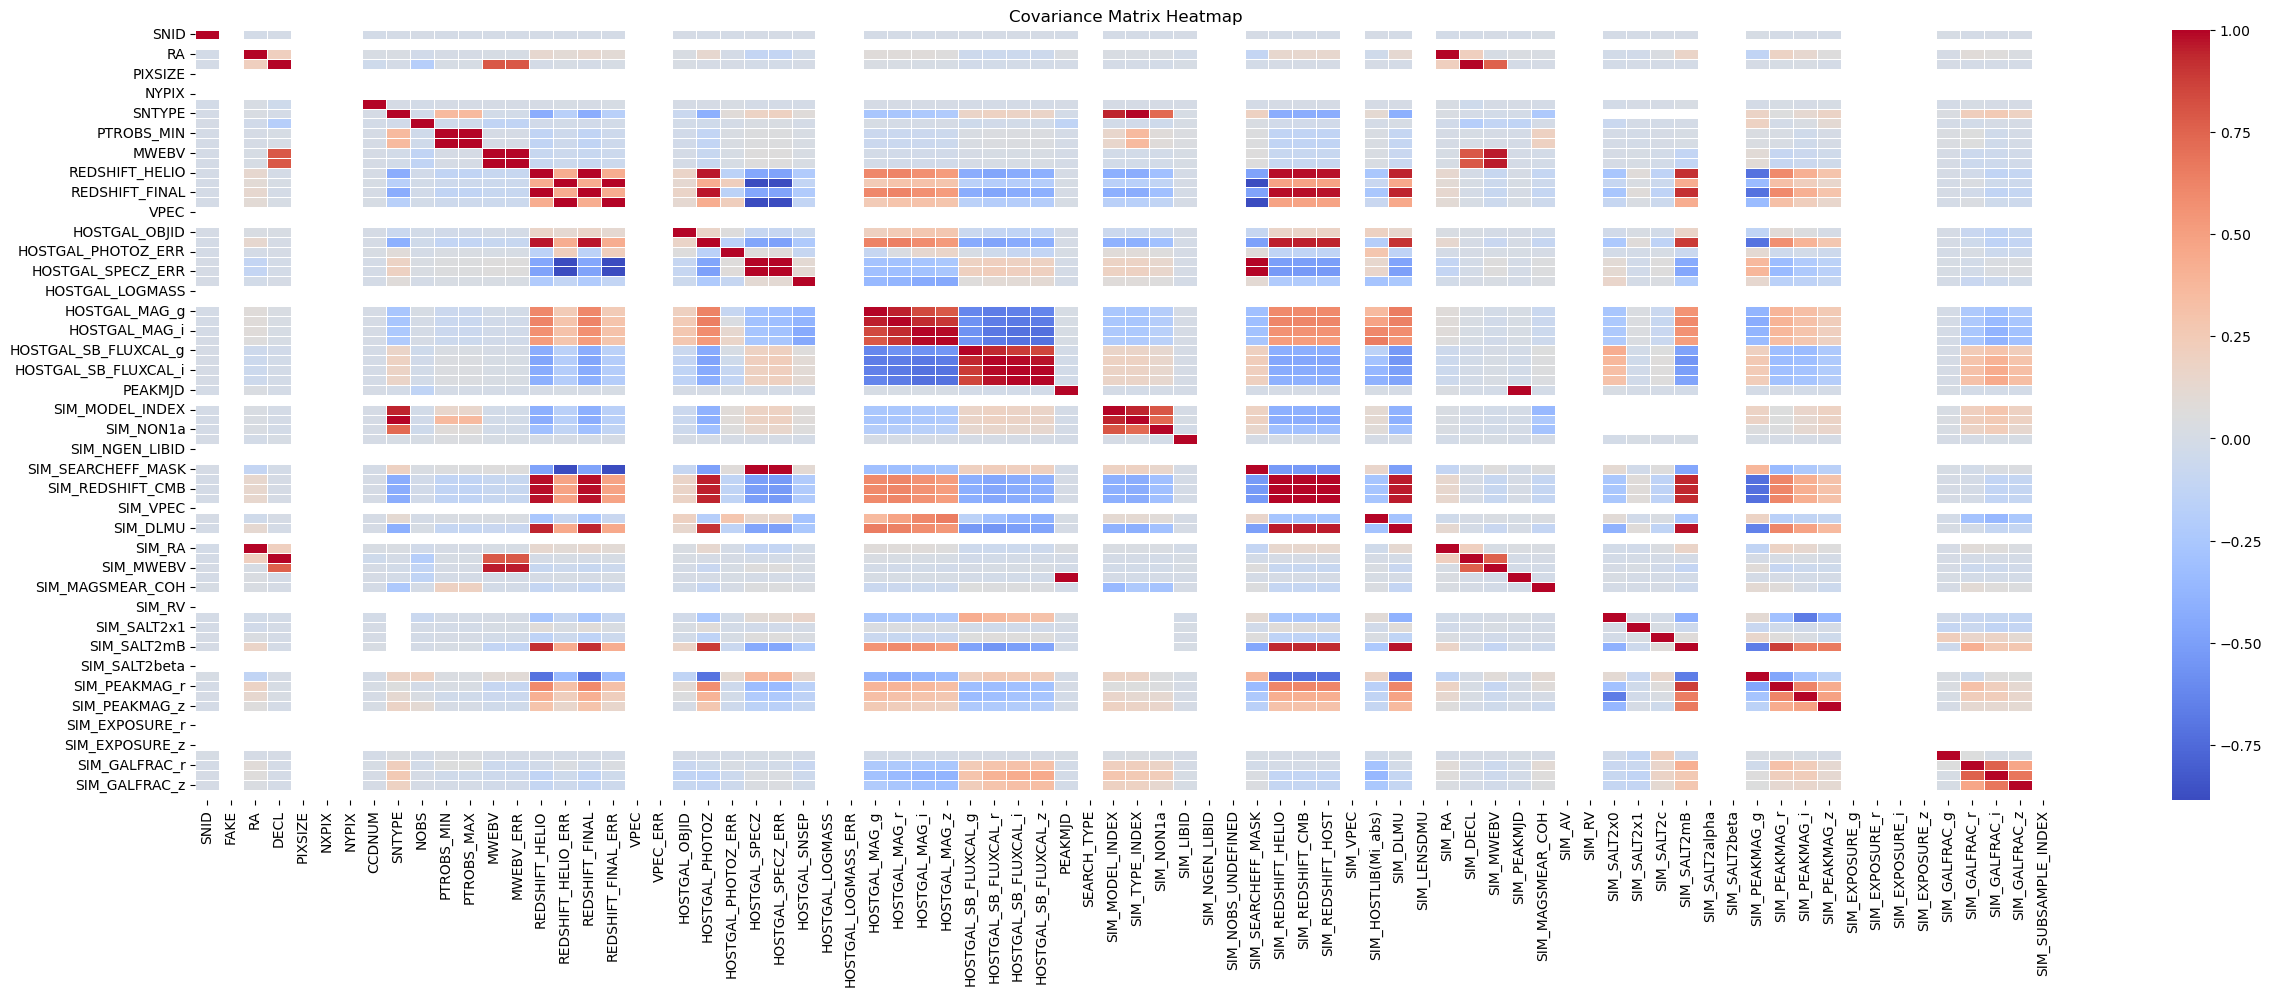

In [77]:
# Correlation map
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

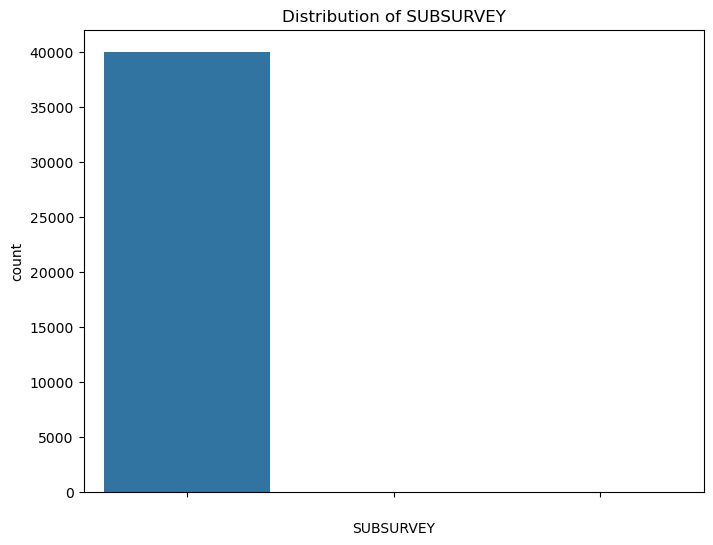

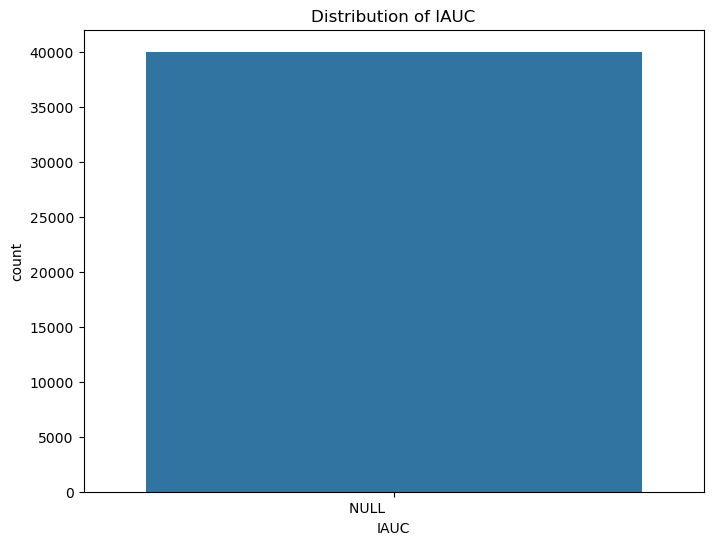

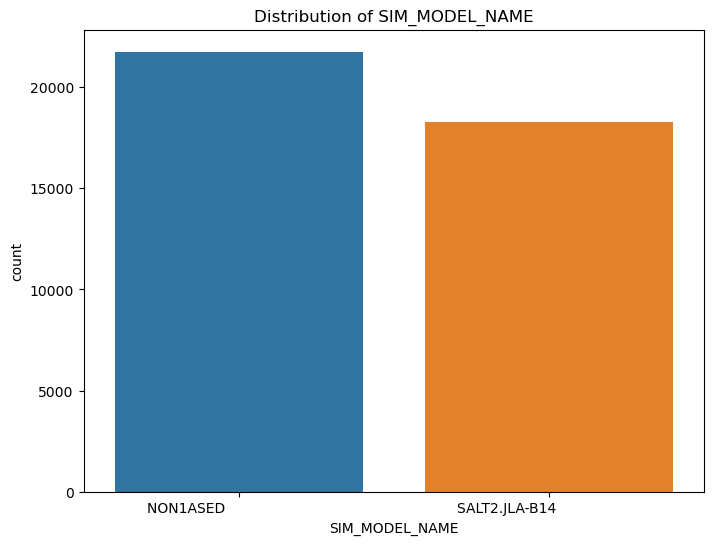

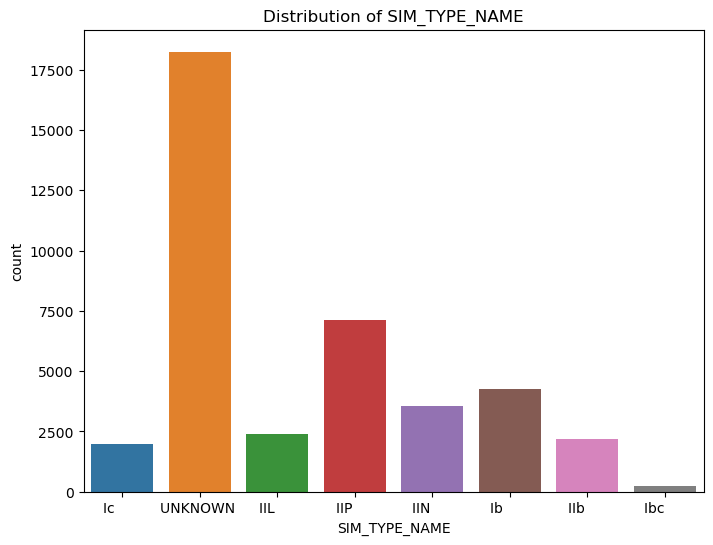

In [78]:
# Visualising the distribution of the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks()
    plt.show()

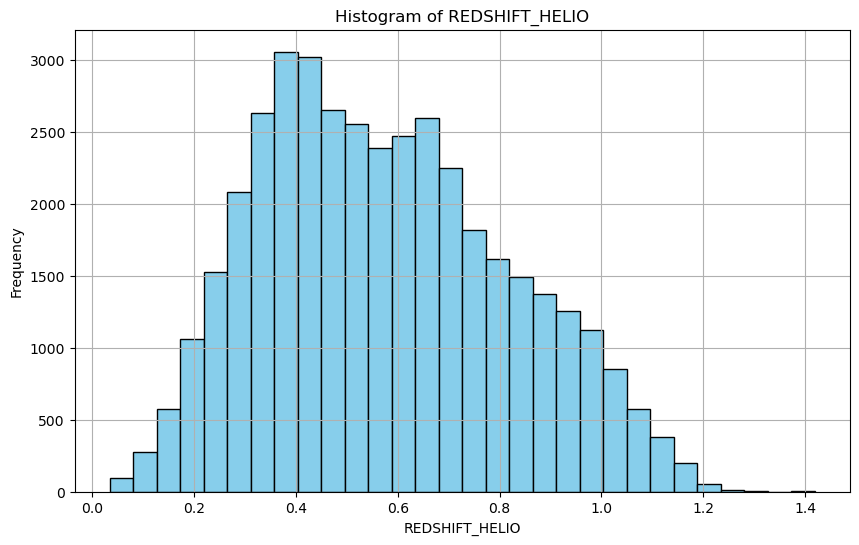

In [79]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['REDSHIFT_HELIO'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of REDSHIFT_HELIO')
plt.xlabel('REDSHIFT_HELIO')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

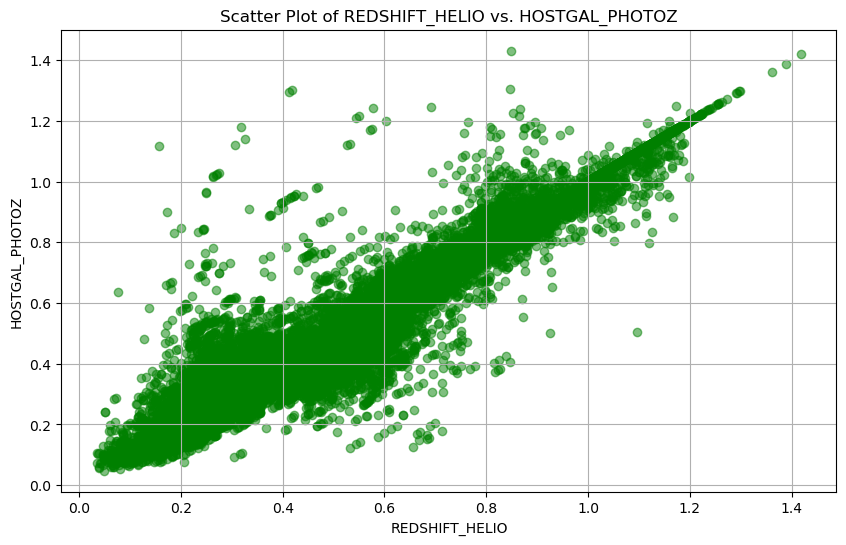

In [81]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['REDSHIFT_HELIO'], df['HOSTGAL_PHOTOZ'], color='green', alpha=0.5)
plt.title('Scatter Plot of REDSHIFT_HELIO vs. HOSTGAL_PHOTOZ')
plt.xlabel('REDSHIFT_HELIO')
plt.ylabel('HOSTGAL_PHOTOZ')
plt.grid(True)
plt.show()

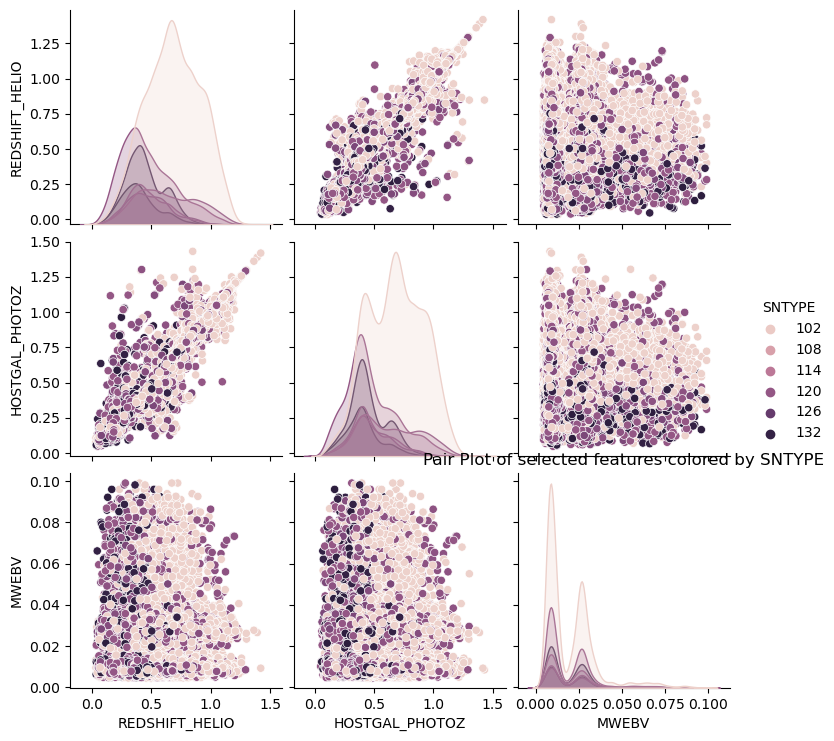

In [82]:
# Pairplot
sns.pairplot(df[['REDSHIFT_HELIO', 'HOSTGAL_PHOTOZ', 'MWEBV', 'SNTYPE']], hue='SNTYPE', diag_kind='kde')
plt.title('Pair Plot of selected features colored by SNTYPE')
plt.show()

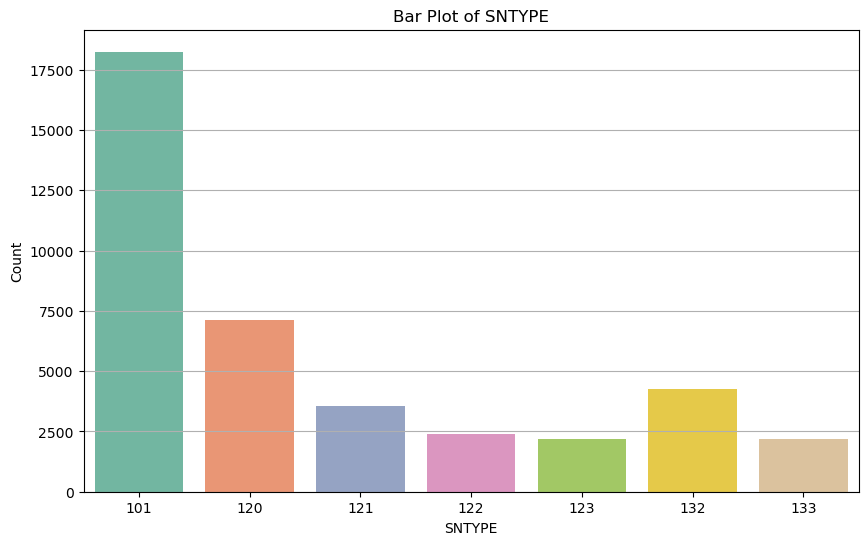

In [83]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='SNTYPE', data=df, palette='Set2')
plt.title('Bar Plot of SNTYPE')
plt.xlabel('SNTYPE')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

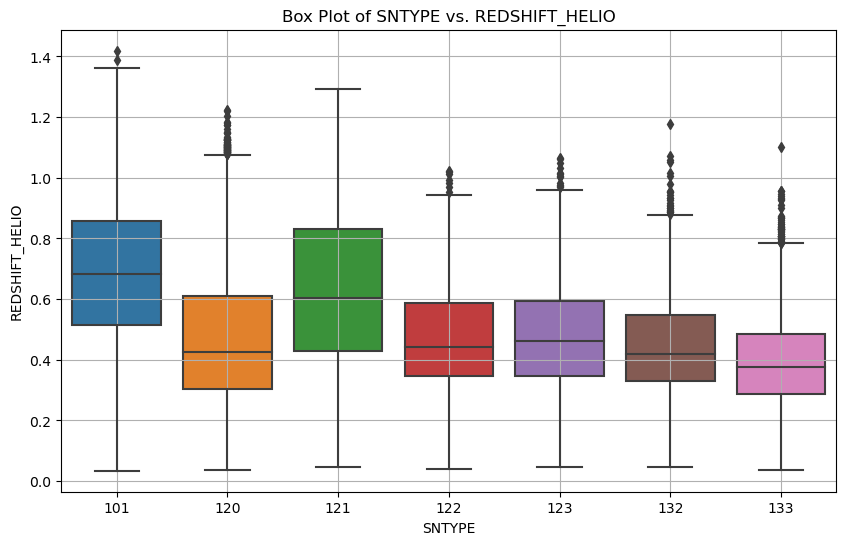

In [84]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SNTYPE', y='REDSHIFT_HELIO', data=df)
plt.title('Box Plot of SNTYPE vs. REDSHIFT_HELIO')
plt.xlabel('SNTYPE')
plt.ylabel('REDSHIFT_HELIO')
plt.grid(True)
plt.show()

### Applying PCA

- Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify complex datasets by transforming them into a lower-dimensional space while preserving most of the original information. It achieves this by identifying and extracting the principal components, which are new variables that capture the maximum variance in the data.
- PCA plays a crucial role in clustering by reducing the dimensionality of the data, removing noise, improving interpretability, enhancing cluster separation, and enabling visualization of clustering results

In [13]:
pca = PCA(n_components=0.95)
pca_d = pca.fit_transform(scaled_df)

- Setting n_components=0.95 in PCA means retaining principal components that collectively explain at least 95% of the variance in the original data. It balances dimensionality reduction and information retention, capturing essential patterns while discarding noise.

In [14]:
# Printing the number of principal components in pca
print("Number of Principal Components:", pca.n_components_)

Number of Principal Components: 25


### K-Means Clustering

- K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping clusters. It aims to minimize the within-cluster variance by iteratively assigning data points to the nearest cluster centroid and updating the centroids.

#### Elbow method to determine the number of clusters

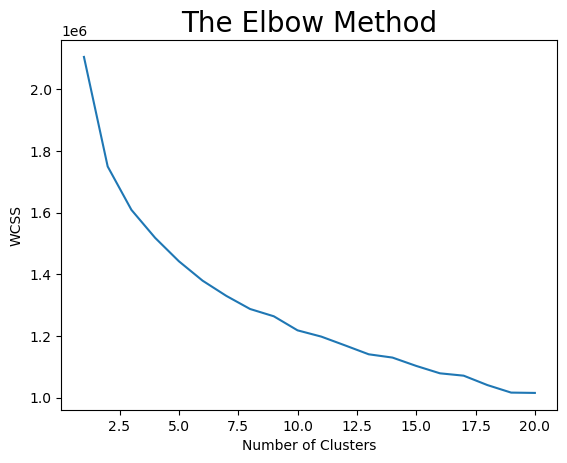

In [87]:
wcss = []  

for i in range(1, 21):  
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)  
    km.fit(pca_d)
    wcss.append(km.inertia_)

# Plotting the graph
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
# Printing the best value of k
rate_of_change = [wcss[i] - wcss[i + 1] for i in range(len(wcss) - 1)]
optimal_k_index = rate_of_change.index(max(rate_of_change))
best_k = optimal_k_index + 2
print("The best k value based on the elbow method is:", best_k)

The best k value based on the elbow method is: 2


- Hence it can be determined from the elbow method that the number of clusters is 2

In [89]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans.fit(pca_d)

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [43]:
pca_df = pd.DataFrame(data=pca_d, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

In [44]:
cluster_labels = kmeans.labels_
pca_df['Cluster'] = cluster_labels

print("Counts of data points in each cluster:")
print(pca_df['Cluster'].value_counts())

Counts of data points in each cluster:
1    20847
0    19153
Name: Cluster, dtype: int64


In [47]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,Cluster
0,-0.586355,-0.622418,-1.516635,-2.072268,4.485340,0.513957,-1.307532,1.207631,-0.024033,0.014400,...,0.400613,0.788078,0.694062,0.353427,-0.588154,0.483227,-0.016397,0.679140,-0.133445,0
1,-7.048675,2.676441,-0.620881,0.365371,-1.170852,2.333930,-0.027770,0.056715,0.004424,-0.196706,...,1.029199,0.868492,0.584121,1.262960,0.328223,-0.588693,0.052814,0.167116,0.205773,0
2,-0.539921,-4.067171,-0.300306,-1.453544,0.091305,-1.587555,-0.245838,1.032852,-1.533663,0.598363,...,0.488091,0.056533,0.390862,0.397638,-0.070613,0.239952,0.419363,0.795320,-1.277673,1
3,10.201771,6.947127,0.855737,1.098716,-0.646287,2.111471,2.995838,1.079875,-3.194827,1.492194,...,-0.475936,-0.814605,1.391137,-0.278423,1.033631,0.084952,0.509982,0.044279,-0.428889,1
4,0.259741,-3.735727,0.288540,1.489551,-0.691203,-1.822533,0.791439,1.563570,-0.795635,-0.354224,...,0.578153,1.107379,1.710774,0.093157,-0.222665,0.189464,-0.142488,0.387784,-0.589552,1


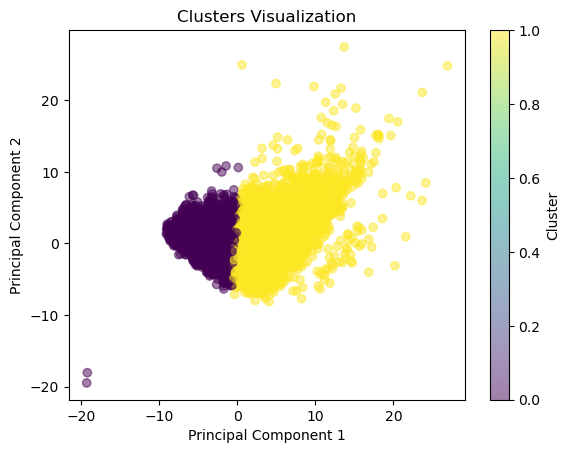

In [90]:
# Visualize clusters using PCA components
plt.scatter(pca_d[:, 0], pca_d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()

### Agglomerative Clustering

- Agglomerative clustering is a hierarchical clustering technique where each data point starts in its own cluster and pairs of clusters are merged iteratively based on some distance or similarity metric until all points belong to a single cluster or a stopping criterion is met. 
- It's a bottom-up approach where clusters are built by progressively merging smaller clusters into larger ones. This method produces a tree-like hierarchical structure called a dendrogram, which can be cut at different levels to obtain clusters of different sizes.

#### Determing the optimal number of clusters using silhouette score

In [22]:
#Initialisation
silhouette_scores = []
optimal_num_clusters = 2
max_silhouette_score = -1

In [ ]:
# Calculating optimal value of k
for num_clusters in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
    agg_labels = agg_clustering.fit_predict(pca_d)
    
    silhouette_avg = silhouette_score(pca_d, agg_labels)
    silhouette_scores.append(silhouette_avg)
    
    if silhouette_avg > max_silhouette_score:
        optimal_num_clusters = num_clusters
        max_silhouette_score = silhouette_avg

In [ ]:
# Printing the optimal values
print("Optimal number of clusters:", optimal_num_clusters)
print("Max silhouette score:", max_silhouette_score)

In [ ]:
# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_num_clusters)

In [ ]:
agg_labels = agg_clustering.fit_predict(pca_d)

In [55]:
pca_df['Cluster_1'] = agg_labels

In [ ]:
print("Counts of data points in each cluster:")
print(pca_df['Cluster_1'].value_counts())

In [17]:
# Calculate linkage matrix
linkage_matrix = linkage(pca_d, method='ward')

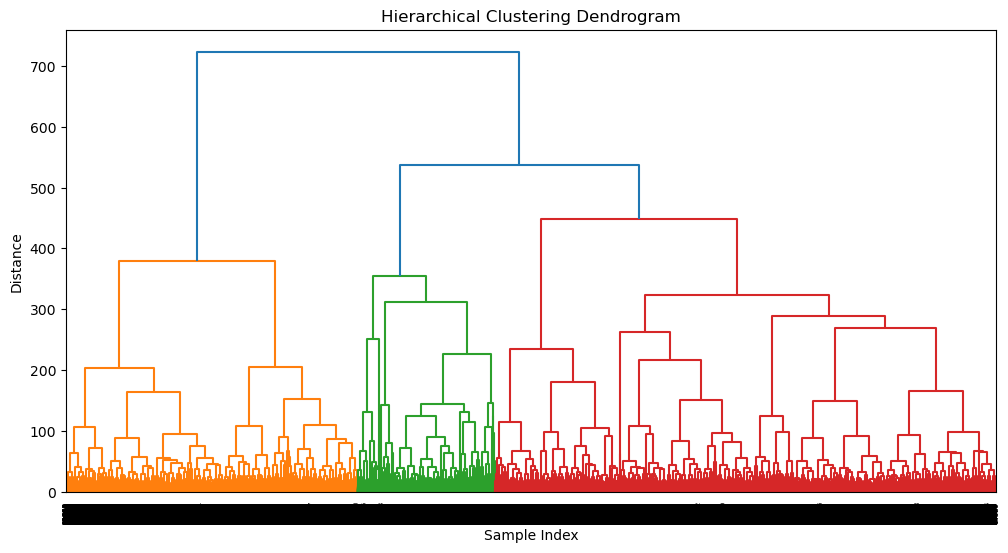

In [18]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Clustering Metrics

- Clustering metrics are used to evaluate the quality and performance of clustering algorithms. 

#### Adjusted Rand Index(ADI)

- The Adjusted Rand Index (ARI) is a measure of the similarity between two clusterings. It considers all pairs of samples and counts those that are assigned to the same or different clusters in the predicted and true clusterings. It then calculates a similarity measure based on these counts, adjusted for chance.

In [ ]:
# For K-means clustering
ari_kmeans = adjusted_rand_score(y, cluster_labels)
print("Adjusted Rand Index (ARI) for K-means clustering:", ari_kmeans)

# For Agglomerative clustering
ari_agg = adjusted_rand_score(y, agg_labels)
print("Adjusted Rand Index (ARI) for Agglomerative clustering:", ari_agg)

#### Silhouette Score

- The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It quantifies how well-separated the clusters are in a given dataset. The score ranges from -1 to 1

In [ ]:
# For K-means clustering
silhouette_score_kmeans = silhouette_score(pca_d, cluster_labels)
print("Silhouette Score for K-means clustering:", silhouette_score_kmeans)

# For Agglomerative clustering
silhouette_score_agg = silhouette_score(pca_d, agg_labels)
print("Silhouette Score for Agglomerative clustering:", silhouette_score_agg)

### Comparitive Analysis:

- K-means Clustering:

    - Achieves good clustering results with an optimal number of clusters determined using the elbow method or silhouette score.
    - Suitable for datasets with well-defined clusters and relatively uniform cluster sizes.
    - Computationally efficient for large datasets due to its linear time complexity.
    - Sensitive to the initial selection of centroids, which may lead to suboptimal solutions.
    - Requires a predefined number of clusters, which may not always be known in advance or may vary based on the dataset.
 
- Works well for datasets with non-linear cluster boundaries and varying cluster sizes.
   - Does not require the number of clusters to be predefined, allowing the algorithm to determine the optimal number of clusters based on the data.
    - Produces a hierarchical clustering structure, allowing for more detailed analysis and interpretation of the data.
    - Can be computationally expensive, especially for large datasets, as it has a time complexity of O(n^3).
    - Can handle different types of distance metrics and linkage criteria, providing flexibility in clustering based on the dataset characteristics.

- So here in the given dataset, using k-means and agglomerative gives us 2 clusters, which as observed from the input data is right as the problem is a binary classification problem
- Here the silouette score is not close to 1 or 0 which means that the clusters are not that well defined which means that the inter cluster distance is quite small comparitively but the intra cluster distance is small which is the ideal case
- Hence it can also be observed from the dendogram also that the clustering is quite good.